### Logistic Regression
- Data preparation
- Visualization
- Create Train and Test Set
- Create a logistic regression Model
- Predictions
- Decision boundary
- How to use sk-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(1)
# data - generate using numpy
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

In [3]:
print(dist_01.shape)

(500, 2)


In [4]:
print(dist_02.shape)

(500, 2)


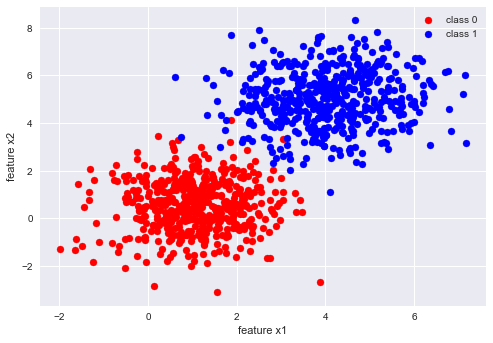

In [5]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color="red",label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color="blue",label="class 1")
plt.xlabel("feature x1")
plt.ylabel("feature x2")
plt.legend()
plt.show()
# This data is not in X and Y terms

In [6]:
data = np.zeros((1000,3))


In [7]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [8]:
# Randomly shuffle the data
np.random.shuffle(data)

In [9]:
# divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

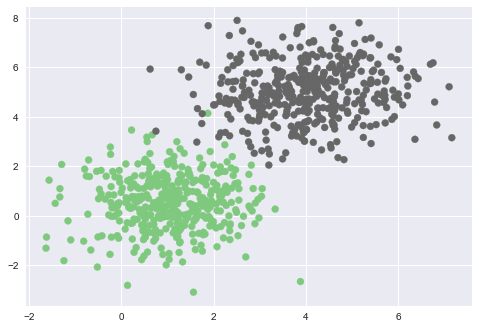

In [10]:
# plot the training data and normalize it

plt.scatter(X_train[:,0],X_train[:,1],c = Y_train,cmap=plt.cm.Accent)

In [11]:
# data normalization
x_mean = np.mean(X_train,axis=0)
x_std = np.std(X_train,axis=0)

In [12]:
X_train = (X_train - x_mean)/x_std

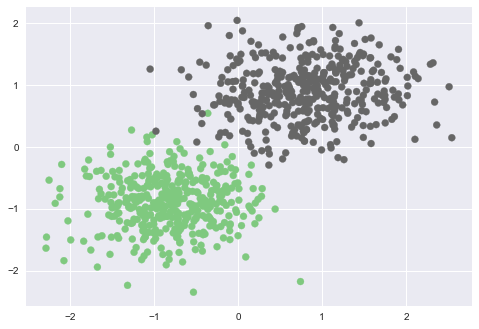

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train,cmap=plt.cm.Accent)

In [14]:
# On testing data we apply mean and std of training data
X_test =(X_test - x_mean)/x_std

In [15]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))


#### Logistic regression implementation -->

In [16]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0*x))
def hypothesis(X,Theta):
    """
    :param X: entire array (m,n+1)
    :param Theta: np.array (n+1,1)
    :return: y_
    """
    y_ = sigmoid(np.dot(X,Theta))
    return  y_

def error(X,y,Theta):
    """
    :param X: (m, n+1)
    :param y: (m,1)
    :param Theta: (n+1,1)
    :return: scale_value = Loss
    """
    hi = hypothesis(X,Theta)
    Loss = -1*np.mean((y*np.log(hi))+ ((1 - y)*np.log(1 - hi)))
    return Loss/X.shape[0]

def gradient(X,y,Theta):
    """

    :param X: (m,n+1)
    :param y: (m,1)
    :param Theta: (n+1,1)
    :return: gradient vector -- (n+1,1)
    """
    grad = np.zeros((X.shape[1],))
    hi = hypothesis(X,Theta)
    grad = np.dot(X.T,(y - hi ))
    return (-1*grad)/X.shape[0]

def gradient_descent(X,y,lr=0.1,max_iter=500):
    Theta = np.zeros((X.shape[1],))
    error_list = []

    for i in range(max_iter):
        error_list.append(error(X,y,Theta))

        grad = gradient(X,y,Theta)

        Theta = Theta - lr*grad


    return  Theta,error_list

In [17]:
Theta,error_list = gradient_descent(X_train,Y_train)

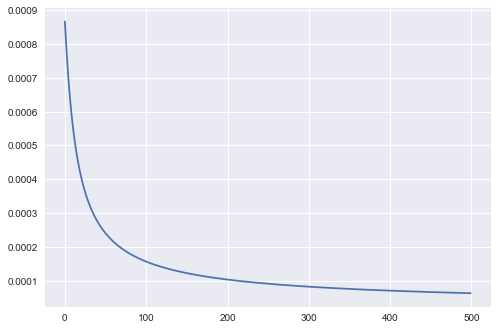

In [18]:
plt.plot(error_list)
plt.show()

In [19]:
Theta


array([0.17279861, 2.20499267, 2.89094414])

In [20]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
y_ = hypothesis(X_test,Theta)

#### Visualise the decision Surface

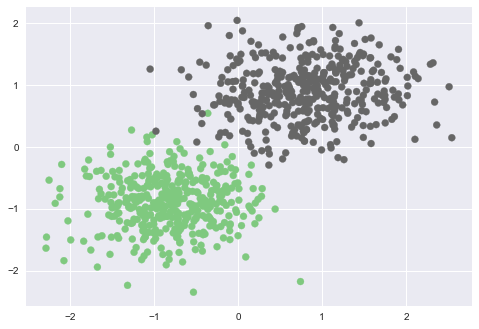

In [21]:
plt.scatter(X_train[:,1],X_train[:,2],c = Y_train,cmap=plt.cm.Accent)
plt.show()

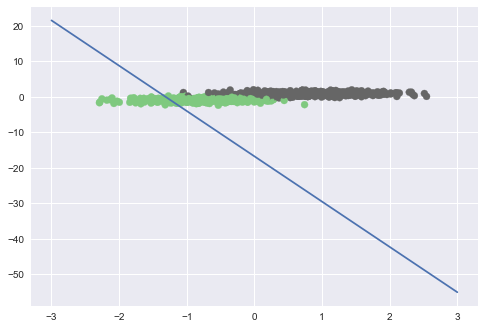

In [22]:
x1 = np.arange(-3,4)
x2 = -1*(Theta[2]+Theta[1]*x1)/Theta[0]
plt.plot(x1,x2)
plt.scatter(X_train[:,1],X_train[:,2],c = Y_train,cmap=plt.cm.Accent)
plt.show()

In [23]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    print(h[:5])

    return output

y_ = predict(X_test,Theta)

[0.99775191 0.0018251  0.10840567 0.99371884 0.69353161]


In [24]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    acc = np.sum(actual == preds)/actual.shape[0]
    print(acc)
    return acc*100

In [25]:
accuracy(Y_test,y_)

0.99


99.0

### How to use sk-learn ?

In [26]:
 from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
theta_0  = model.intercept_
theta_s  = model.coef_

In [30]:
print(theta_0,theta_s)

[0.45091915] [[-1.31052348e-06  2.98470257e+00  4.50325917e+00]]


In [31]:
model.score(X_train,Y_train)

0.995

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred.shape

(200,)